In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\SRIKAR PILLALAMARRI\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

Each image is a 28x28 sized image.

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

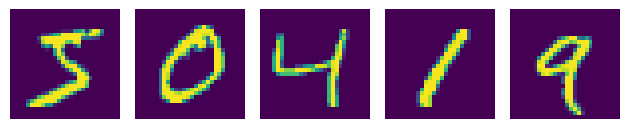

In [8]:
for i in range(5):  # Loop through the first 5 items
    plt.subplot(1, 5, i + 1)  # Create a 1-row, 5-column subplot grid
    plt.imshow(X_train[i])  # Use imshow instead of matshow for compatibility
    plt.axis('off')  # Optional: turn off axis labels for better visualization

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

In [9]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

Since neural network can take only one dimensional data, we need to flatten the array as 1D data.

In [10]:
X_train = X_train/255
X_test = X_test/255

In [11]:
print(X_train.shape)
X_train_flattened = X_train.reshape(len(X_train),28*28)# len(X_train) is 60000

(60000, 28, 28)


Here, the images are in grey scale. That's the reason the images are shown as 60000,28,28. If it is in the RGB then it will be as 60000,28,28,3

In [12]:
X_test_flattened = X_test.reshape(len(X_test),28*28)# len(X_test) is 10000
print(X_test_flattened.shape)
print(X_train_flattened.shape)

(10000, 784)
(60000, 784)


In [13]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape = (784,), activation = 'sigmoid') # Here,10 is the output neurons
])

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [15]:
model.fit(X_train_flattened,y_train,epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8100 - loss: 0.7247
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 832us/step - accuracy: 0.9141 - loss: 0.3107
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 834us/step - accuracy: 0.9211 - loss: 0.2828
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 845us/step - accuracy: 0.9231 - loss: 0.2731
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 792us/step - accuracy: 0.9249 - loss: 0.2675


In [16]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9151 - loss: 0.2990


[0.26572999358177185, 0.9259999990463257]

In [17]:
y_pred = model.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


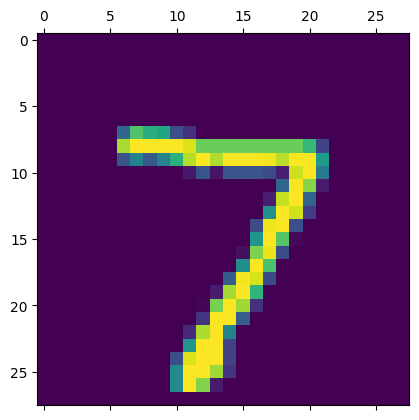

In [18]:
plt.matshow(X_test[0])

In [19]:
y_pred[0]

array([2.5739726e-02, 2.6941612e-07, 3.8500167e-02, 9.5854014e-01,
       2.3426118e-03, 1.4971685e-01, 1.4559789e-06, 9.9981886e-01,
       9.4252266e-02, 6.4209771e-01], dtype=float32)

In [20]:
np.argmax(y_pred[0])

7

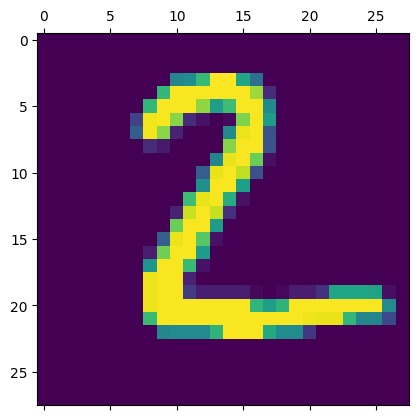

In [21]:
plt.matshow(X_test[1])

In [22]:
np.argmax(y_pred[1])

2

In [23]:
y_predicted_labels = [np.argmax(i) for i in y_pred]
y_predicted_labels

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 6,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 6,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 2,
 7,
 4,
 2,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 9,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 3,
 0,
 8,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 7,
 9,
 3,
 9,
 0,
 3,
 5,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 7,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 8,
 8,
 7,
 2,
 5,
 0,
 6,
 4,
 2,


In [24]:
# we have taken the y_pred_labels because, the labels have to compared with the output
cm = tf.math.confusion_matrix(labels = y_test,predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    1,    1,    0,    5,    9,    4,    1,    0],
       [   0, 1108,    3,    2,    0,    1,    4,    2,   15,    0],
       [   8,    9,  919,   18,    8,    5,   12,   11,   39,    3],
       [   4,    0,   14,  909,    0,   34,    3,   11,   26,    9],
       [   1,    1,    2,    1,  915,    0,   11,    4,   10,   37],
       [   8,    2,    2,   23,    8,  795,   13,    5,   30,    6],
       [   8,    3,    7,    1,    7,   14,  914,    2,    2,    0],
       [   1,    5,   23,    4,    8,    0,    0,  958,    3,   26],
       [   7,    7,    7,   16,    9,   27,    9,   11,  874,    7],
       [  10,    7,    2,    9,   30,    8,    0,   27,    7,  909]])>

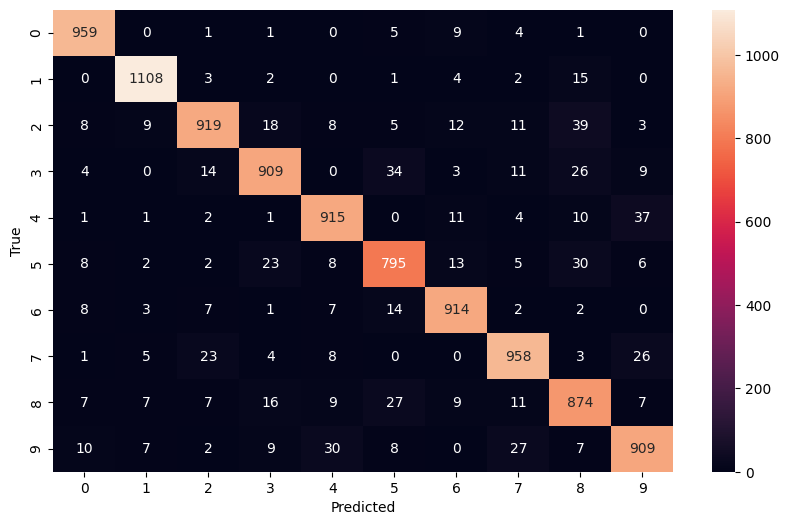

In [25]:
import seaborn as sns
plt.figure(figsize = (10,6))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [26]:
model1 = keras.Sequential([
    keras.layers.Dense(100,input_shape = (784,), activation = 'relu'),# Here,10 is the output neurons
    keras.layers.Dense(10, activation = 'sigmoid')
])
model1.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model1.fit(X_train_flattened,y_train,epochs = 5)

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8684 - loss: 0.4617
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9614 - loss: 0.1315
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9727 - loss: 0.0912
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9808 - loss: 0.0651
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9859 - loss: 0.0492


In [27]:
model1.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - accuracy: 0.9686 - loss: 0.1028


[0.09034578502178192, 0.9728999733924866]

In [28]:
y_pred_model1 = model1.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [29]:
y_pred_model1_labels = [np.argmax(i) for i in y_pred_model1]
cm = tf.math.confusion_matrix(labels = y_test,predictions = y_pred_model1_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    1,    0,    0,    1,    7,    1,    2,    1],
       [   0, 1116,    3,    1,    0,    0,    3,    0,   12,    0],
       [   5,    1,  999,    7,    3,    0,    3,    5,    9,    0],
       [   0,    1,    0,  992,    0,    3,    0,    3,    9,    2],
       [   0,    0,    1,    0,  965,    0,    9,    0,    3,    4],
       [   2,    0,    0,   16,    1,  851,    7,    1,   10,    4],
       [   2,    3,    0,    1,    2,    3,  943,    0,    4,    0],
       [   2,    5,   11,    3,    4,    0,    0,  989,    9,    5],
       [   3,    0,    3,    7,    2,    1,    3,    2,  952,    1],
       [   3,    5,    0,    5,   14,    2,    0,    4,   21,  955]])>

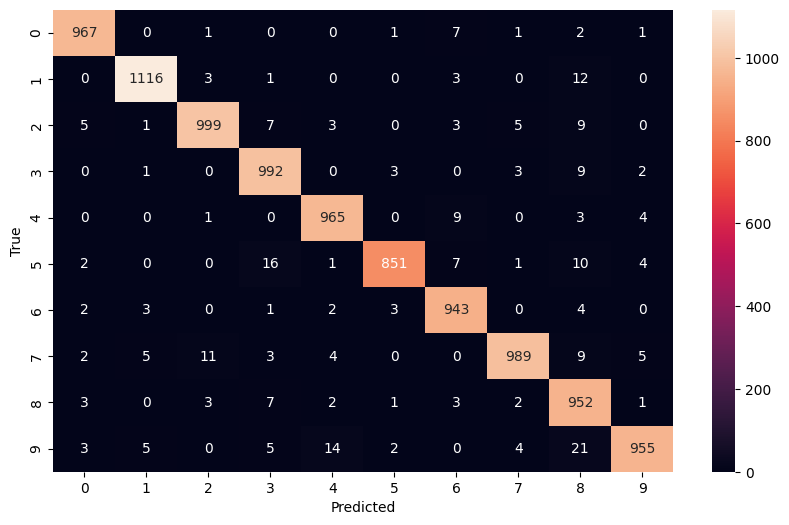

In [30]:
import seaborn as sns
plt.figure(figsize = (10,6))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [52]:
train_images = X_train.reshape((60000,28,28,1)).astype('float32')/255
test_images = X_test.reshape((10000,28,28,1)).astype('float32')/255

In [53]:
# Here, we are converting the numerical data to categorical data
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

In [54]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [55]:
test_labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [57]:
classifier = Sequential()
classifier.add(Conv2D(32,(3,3),input_shape = (28,28,1), activation = 'relu'))
classifier.add(MaxPooling2D(2,2))
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(2,2))
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(Flatten())
classifier.add(Dense(64, activation = 'relu'))
classifier.add(Dense(10, activation = 'softmax'))

OUTPUT SIZE = (input size - Filter size + 2*Padding)/Stride  + 1

In [58]:
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [59]:
history = classifier.fit(train_images, train_labels, epochs = 5, batch_size = 64, validation_split = 0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.3944 - loss: 1.6523 - val_accuracy: 0.8751 - val_loss: 0.4051
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.8787 - loss: 0.3922 - val_accuracy: 0.9178 - val_loss: 0.2765
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.9133 - loss: 0.2790 - val_accuracy: 0.9312 - val_loss: 0.2275
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.9363 - loss: 0.2059 - val_accuracy: 0.9516 - val_loss: 0.1632
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.9491 - loss: 0.1594 - val_accuracy: 0.9619 - val_loss: 0.1291


In [60]:
test_loss, test_acc = classifier.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9594 - loss: 0.1397


In [61]:
print("Test Accuracy of the model is: ", test_acc)

Test Accuracy of the model is:  0.9638000130653381


In [64]:
from tensorflow.keras import layers, models
classifier1 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),  # Dropout to reduce overfitting
    layers.BatchNormalization(),  # Batch normalization for stable training
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.BatchNormalization(),  # Batch normalization for the dense layers
    layers.Dense(10, activation='softmax')  # Output layer
])


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [65]:
classifier1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history1 = classifier1.fit(train_images, train_labels, epochs = 5, batch_size = 64, validation_split = 0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.2827 - loss: 1.9322 - val_accuracy: 0.5156 - val_loss: 1.5410
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.4929 - loss: 1.4021 - val_accuracy: 0.5612 - val_loss: 1.3444
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.5490 - loss: 1.2689 - val_accuracy: 0.6018 - val_loss: 1.2192
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.5828 - loss: 1.1964 - val_accuracy: 0.5555 - val_loss: 1.3382
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.6255 - loss: 1.0892 - val_accuracy: 0.4367 - val_loss: 1.5724


In [67]:
test_loss, test_acc = classifier1.evaluate(test_images, test_labels)
print("Test Accuracy of the model is: ", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4261 - loss: 1.6413
Test Accuracy of the model is:  0.454800009727478


In [74]:
from tensorflow.keras import layers, models
classifier2 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),  # No need for input_shape here
    layers.MaxPooling2D((2,2)),
    layers.Dense(64, activation='relu'),
    layers.Flatten(),
    layers.Dropout(0.5),  # Dropout to reduce overfitting
    layers.BatchNormalization(),  # Batch normalization for stable training
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.BatchNormalization(),  # Batch normalization for the dense layers
    layers.Dense(10, activation='softmax')  # Output layer
])

In [75]:
classifier2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history2 = classifier2.fit(train_images, train_labels, epochs = 5, batch_size = 64, validation_split = 0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.1099 - loss: 2.3275 - val_accuracy: 0.1060 - val_loss: 2.3018
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.1153 - loss: 2.3012 - val_accuracy: 0.1060 - val_loss: 2.3021
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.1156 - loss: 2.3007 - val_accuracy: 0.1060 - val_loss: 2.3020
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.1128 - loss: 2.3014 - val_accuracy: 0.1060 - val_loss: 2.3022
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.1130 - loss: 2.3013 - val_accuracy: 0.1060 - val_loss: 2.3020


In [85]:
test_loss, test_acc = classifier2.evaluate(test_images, test_labels)
print("Test Accuracy of the model is: ", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1160 - loss: 2.3010
Test Accuracy of the model is:  0.11349999904632568
